In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score

In [24]:
df = pd.read_csv('C:/Users\Иван\Downloads\data.csv', parse_dates=["timestamp"])

In [25]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [26]:
df.isna().sum()

id                                          0
timestamp                                   0
full_sq                                     0
life_sq                                  4103
floor                                     113
max_floor                                6303
material                                 6303
build_year                               8905
num_room                                 6303
kitch_sq                                 6303
state                                    8907
product_type                                0
sub_area                                    0
area_m                                      0
raion_popul                                 0
green_zone_part                             0
indust_part                                 0
children_preschool                          0
preschool_quota                          4279
preschool_education_centers_raion           0
children_school                             0
school_quota                      

In [27]:
df = df.fillna(df.mean())

C:\Users\Иван\AppData\Local\Temp\ipykernel_8724\114435927.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())
C:\Users\Иван\AppData\Local\Temp\ipykernel_8724\114435927.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [28]:
df = df.drop(columns=['timestamp'])

In [158]:
pd.set_option('display.max_columns', None)

In [159]:
pd.set_option('display.max_rows', None)

In [31]:
df = pd.get_dummies(df)

In [32]:
df.head()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_c

In [33]:
df.isna().sum()

id                                         0
full_sq                                    0
life_sq                                    0
floor                                      0
max_floor                                  0
material                                   0
build_year                                 0
num_room                                   0
kitch_sq                                   0
state                                      0
area_m                                     0
raion_popul                                0
green_zone_part                            0
indust_part                                0
children_preschool                         0
preschool_quota                            0
preschool_education_centers_raion          0
children_school                            0
school_quota                               0
school_education_centers_raion             0
school_education_centers_top_20_raion      0
hospital_beds_raion                        0
healthcare

In [34]:
X = df.drop(columns=['price'])
y = df['price']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Baseline**

In [36]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)
print(mean_squared_error(y_test, y_pred_dtr))
print(accuracy_score(y_test, y_pred_dtr))
print(f1_score(y_test, y_pred_dtr, average='macro'))

14595853035051.9
0.04
0.019947062638875687


# **Feature Engineering**

In [2]:
df = pd.read_csv('C:/Users\Иван\Downloads\data.csv', parse_dates=["timestamp"])

In [3]:
month_year = (df.timestamp.dt.month + df.timestamp.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
df["month_year_cnt"] = month_year.map(month_year_cnt_map)

week_year = (df.timestamp.dt.weekofyear + df.timestamp.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
df["week_year_cnt"] = week_year.map(week_year_cnt_map)

C:\Users\Иван\AppData\Local\Temp\ipykernel_24524\1267522124.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week_year = (df.timestamp.dt.weekofyear + df.timestamp.dt.year * 100)


In [4]:
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month

In [5]:
df['floor_max_floor'] = df['floor']/df['max_floor']

In [6]:
df['kitch_sq_full_sq'] = df['kitch_sq']/df['full_sq']

In [7]:
df = df.drop(columns=['timestamp'])

In [8]:
df = pd.get_dummies(df)

In [9]:
df = df.fillna(df.mean())

In [10]:
a = df.loc[df["floor_max_floor"] != np.inf, "floor_max_floor"].max()
df["floor_max_floor"].replace(np.inf, a, inplace=True)
a = df.loc[df["kitch_sq_full_sq"] != np.inf, "kitch_sq_full_sq"].max()
df["kitch_sq_full_sq"].replace(np.inf, a, inplace=True)

In [11]:
df.head()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,water_1line_yes,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
0,0,1,1.0,1.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,0,1,0,1,0,0,0,0,1,0
1,1,64,64.0,16.0,12.603928,1.838505,3687.417575,1.91071,6.454917,2.106193,...,0,1,0,1,0,0,0,1,0,0
2,2,83,44.0,9.0,17.000000,1.000000,1985.000000,3.00000,10.000000,3.000000,...,0,1,0,1,0,0,1,0,0,0
3,3,71,49.0,2.0,12.603928,1.838505,3687.417575,1.91071,6.454917,2.106193,...,0,1,0,1,0,0,0,1,0,0
4,4,60,42.0,9.0,9.000000,1.000000,1970.000000,3.00000,6.000000,2.000000,...,1,1,0,1,0,0,1,0,0,0


In [12]:
df.isna().sum()

id                      0
full_sq                 0
life_sq                 0
floor                   0
max_floor               0
                       ..
ecology_excellent       0
ecology_good            0
ecology_no data         0
ecology_poor            0
ecology_satisfactory    0
Length: 459, dtype: int64

In [13]:
X = df.drop(columns=['price'])
y = df['price']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)
print(mean_squared_error(y_test, y_pred_dtr))
print(accuracy_score(y_test, y_pred_dtr))
print(f1_score(y_test, y_pred_dtr, average='macro'))

14891189890112.123
0.04425
0.020050510012747932


**Подберем гиперпараметры**

In [52]:
c = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
for i in c:
  dt = DecisionTreeRegressor(criterion=i)
  dt.fit(X_train, y_train)
  y_pred_tree = dt.predict(X_test)
  print(f1_score(y_test, y_pred_tree, average='macro'))

0.021522378507026298
0.020043587205213105
0.02143664801744389
0.016673596344811966


In [53]:
c = ['best', 'random']
for i in c:
  dt = DecisionTreeRegressor(splitter=i)
  dt.fit(X_train, y_train)
  y_pred_tree = dt.predict(X_test)
  print(f1_score(y_test, y_pred_tree, average='macro'))

0.020656430446667467
0.0225290575709333


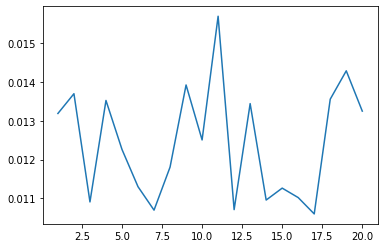

In [54]:
e = []
c = []
for i in range(1, 21):
  dt = DecisionTreeRegressor(max_features = i)
  dt.fit(X_train, y_train)
  y_pred_tree = dt.predict(X_test)
  e.append(f1_score(y_test, y_pred_tree, average='macro'))
  c.append(i)
plt.plot(c, e)
plt.show()

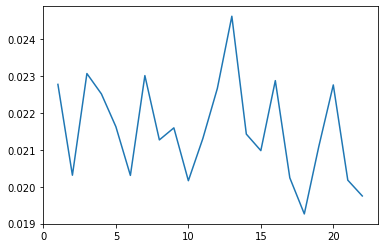

In [55]:
c = []
e = []
for i in range(1, 23):
  dt = DecisionTreeRegressor(random_state=i, criterion='friedman_mse')
  dt.fit(X_train, y_train)
  y_pred_tree = dt.predict(X_test)
  e.append(f1_score(y_test, y_pred_tree, average='macro'))
  c.append(i)
plt.plot(c, e)
plt.show()

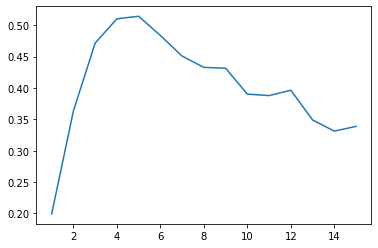

In [56]:
c = []
e = []
for i in range(1, 16):
  dt = DecisionTreeRegressor(random_state=13, criterion='friedman_mse', max_depth=i)
  dt.fit(X_train, y_train)
  y_pred_tree = dt.predict(X_test)
  e.append(dt.score(X_test, y_test))
  c.append(i)
plt.plot(c, e)
plt.show()

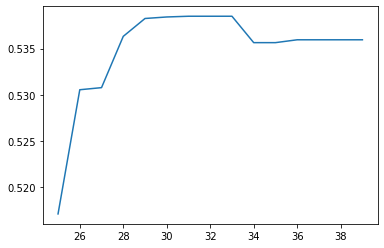

In [57]:
c = []
e = []
for i in range(25, 40):
  dt = DecisionTreeRegressor(random_state=13, criterion='friedman_mse', max_depth=5, min_samples_leaf=i)
  dt.fit(X_train, y_train)
  y_pred_tree = dt.predict(X_test)
  e.append(dt.score(X_test, y_test))
  c.append(i)
plt.plot(c, e)
plt.show()

In [58]:
dt = DecisionTreeRegressor(criterion='friedman_mse', random_state=13, max_depth=5, min_samples_leaf=33)
dt.fit(X_train, y_train)
y_pred_tree = dt.predict(X_test)
print(dt.score(X_test, y_test))

0.5384945968590803


**Попробуем GridSearch**

In [67]:
hgs_dt = HalvingGridSearchCV(DecisionTreeRegressor(),
                                  [{'criterion':['squared_error', 'friedman_mse', 'poisson'],
                                    'splitter':['best', 'random'],
                                    'max_depth':range(1, 16),
                                    'min_samples_leaf':range(10, 51, 5),
                                    'random_state':range(1, 16)}
                                   ], scoring = 'r2', cv = 5
                                  )
hgs_dt.fit(X_train, y_train)
print(hgs_dt.best_estimator_)
print(hgs_dt.best_score_)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=30, random_state=15)
0.5274722281656892


In [69]:
dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=30, random_state=15)
dt.fit(X_train, y_train)
y_pred_tree = dt.predict(X_test)
print(dt.score(X_test, y_test))

0.5551985880546553


# **Model Selection**

In [60]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Иван\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [61]:
pip install lightgbm

You should consider upgrading via the 'C:\Users\Иван\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [62]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Иван\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [16]:
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

## **Стандартные модели(без параметров)**

**DecisionTreeRegressor**

In [65]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)
print(mean_squared_error(y_test, y_pred_dtr))
print(dtr.score(X_test, y_test))

13990188842880.16
0.2974660292532235


**RandomForestRegressor**

In [66]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
print(mean_squared_error(y_test, y_pred_rfr))
print(rfr.score(X_test, y_test))

6914396951185.901
0.6527853340658694


**CatBoostRegressor**


In [74]:
cat = CatBoostRegressor(verbose=False)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)
print(mean_squared_error(y_test, y_pred_cat))
print(cat.score(X_test, y_test))

6322293837049.394
0.6825184961080348


**LightGBM**

In [75]:
light = LGBMRegressor()
light.fit(X_train, y_train)
y_pred_light = light.predict(X_test)
print(mean_squared_error(y_test, y_pred_light))
print(light.score(X_test, y_test))

6382878522035.74
0.679476164100375


**XGBoost**

In [76]:
xb = XGBRegressor(objective ='reg:squarederror')
xb.fit(X_train, y_train)
y_pred_xb = xb.predict(X_test)
print(mean_squared_error(y_test, y_pred_xb))
print(xb.score(X_test, y_test))

6677988620946.54
0.6646568595203093


## **Перебор параметров**

**DecisionTreeRegressor**

In [70]:
dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=30, random_state=15)
dt.fit(X_train, y_train)
y_pred_tree = dt.predict(X_test)
print(dt.score(X_test, y_test))

0.5551985880546553


**RandomForestRegressor**

In [71]:
hgs_forest = HalvingGridSearchCV(RandomForestRegressor(),
                                 [{'max_depth':range(1, 16,2),
                                   'min_samples_leaf':range(10, 51, 10),
                                   'n_estimators':range(10, 101, 10)}
                                  ], scoring = 'r2', cv = 5
                                )
hgs_forest.fit(X_train, y_train)
print(hgs_forest.best_estimator_)
print(hgs_forest.best_score_)

RandomForestRegressor(max_depth=15, min_samples_leaf=10, n_estimators=60)
0.6672263815629285


In [77]:
rfr = RandomForestRegressor(max_depth=15, min_samples_leaf=10, n_estimators=60)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
print(rfr.score(X_test, y_test))

0.6485362389504907


**catboost**

In [28]:
cat = CatBoostRegressor(verbose=False)        
gs_cat = cat.grid_search({'depth': range(1, 16, 2),
                            'iterations':range(10, 101, 10)},
                           X=X_train, y=y_train, plot=False)


bestTest = 6721259.89
bestIteration = 9

0:	loss: 6721259.8901204	best: 6721259.8901204 (0)	total: 113ms	remaining: 8.96s

bestTest = 5569038.951
bestIteration = 19

1:	loss: 5569038.9506242	best: 5569038.9506242 (1)	total: 177ms	remaining: 6.92s

bestTest = 4810020.121
bestIteration = 29

2:	loss: 4810020.1206888	best: 4810020.1206888 (2)	total: 274ms	remaining: 7.02s

bestTest = 4312418.328
bestIteration = 39

3:	loss: 4312418.3282942	best: 4312418.3282942 (3)	total: 408ms	remaining: 7.75s

bestTest = 3986823.722
bestIteration = 49

4:	loss: 3986823.7224100	best: 3986823.7224100 (4)	total: 575ms	remaining: 8.62s

bestTest = 3773485.164
bestIteration = 59

5:	loss: 3773485.1638073	best: 3773485.1638073 (5)	total: 785ms	remaining: 9.69s

bestTest = 3627303.43
bestIteration = 69

6:	loss: 3627303.4304130	best: 3627303.4304130 (6)	total: 1.02s	remaining: 10.6s

bestTest = 3527422.598
bestIteration = 79

7:	loss: 3527422.5983238	best: 3527422.5983238 (7)	total: 1.29s	remaining: 11.6s

be


bestTest = 3345477.815
bestIteration = 59

65:	loss: 3345477.8148277	best: 2765528.5204542 (39)	total: 14m 51s	remaining: 3m 9s

bestTest = 3171536.284
bestIteration = 69

66:	loss: 3171536.2840308	best: 2765528.5204542 (39)	total: 17m 49s	remaining: 3m 27s

bestTest = 3053371.277
bestIteration = 79

67:	loss: 3053371.2770428	best: 2765528.5204542 (39)	total: 21m 16s	remaining: 3m 45s

bestTest = 2965506.871
bestIteration = 89

68:	loss: 2965506.8710834	best: 2765528.5204542 (39)	total: 25m 40s	remaining: 4m 5s

bestTest = 2905695.895
bestIteration = 99

69:	loss: 2905695.8945817	best: 2765528.5204542 (39)	total: 37m 36s	remaining: 5m 22s

bestTest = 6753584.522
bestIteration = 9

70:	loss: 6753584.5215967	best: 2765528.5204542 (39)	total: 41m 43s	remaining: 5m 17s

bestTest = 5526468.767
bestIteration = 19

71:	loss: 5526468.7669617	best: 2765528.5204542 (39)	total: 50m 10s	remaining: 5m 34s

bestTest = 4681184.678
bestIteration = 29

72:	loss: 4681184.6775770	best: 2765528.5204542 (

KeyboardInterrupt: 

**Лучшие параметры: iterations=19, depth=15**

In [30]:
cat = CatBoostRegressor(verbose=False, iterations=19, depth=15)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)
print(mean_squared_error(y_test, y_pred_cat))
print(cat.score(X_test, y_test))

8781140913423.453
0.5590445659542411


**LightGBM**

In [78]:
hgs_LGBMR = HalvingGridSearchCV(LGBMRegressor(),
                                  [{'max_depth':range(1, 16),
                                    'n_estimators':range(10, 101, 10)}
                                   ], scoring = 'r2', cv = 5
                                  )
hgs_LGBMR.fit(X_train, y_train)
print(hgs_LGBMR.best_estimator_)
print(hgs_LGBMR.best_score_)

LGBMRegressor(max_depth=10, n_estimators=30)
0.6643622031312809


In [79]:
light = LGBMRegressor(max_depth=10, n_estimators=40)
light.fit(X_train, y_train)
y_pred_light = light.predict(X_test)
print(light.score(X_test, y_test))

0.6663091733531368


**XGBoost**

In [21]:
hgs_XGBR = HalvingGridSearchCV(XGBRegressor(objective ='reg:squarederror'),
                                  [{'max_depth':range(1, 16),
                                    'n_estimators':range(10, 101, 10)}
                                   ], scoring = 'r2', cv = 5
                                  )
hgs_XGBR.fit(X_train, y_train)
print(hgs_XGBR.best_estimator_)
print(hgs_XGBR.best_score_)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=60, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
0.6657842717120059


In [25]:
xb = XGBRegressor(max_depth=2, n_estimators=60)
xb.fit(X_train, y_train)
y_pred_xb = xb.predict(X_test)
print(xb.score(X_test, y_test))

0.6032001535456055


**Лучший результат у LightGBM**

# **Ensemble v.1**

In [161]:
df = pd.read_csv('C:/Users\Иван\Downloads\data.csv', parse_dates=["timestamp"])

In [162]:
month_year = (df.timestamp.dt.month + df.timestamp.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
df["month_year_cnt"] = month_year.map(month_year_cnt_map)

week_year = (df.timestamp.dt.weekofyear + df.timestamp.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
df["week_year_cnt"] = week_year.map(week_year_cnt_map)

C:\Users\Иван\AppData\Local\Temp\ipykernel_24524\1267522124.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week_year = (df.timestamp.dt.weekofyear + df.timestamp.dt.year * 100)


In [163]:
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month

In [164]:
df['floor_max_floor'] = df['floor']/df['max_floor']

In [165]:
df['kitch_sq_full_sq'] = df['kitch_sq']/df['full_sq']

In [166]:
df = df.drop(columns=['timestamp'])

In [167]:
df = pd.get_dummies(df)

In [168]:
df = df.fillna(df.mean())

In [169]:
invest = df.loc[df["product_type_Investment"] == 1, :]
invest_X = invest.drop(columns="price")
invest_y = invest["price"]
owner = df.loc[df["product_type_OwnerOccupier"] == 1, :]
owner_X = owner.drop(columns="price")
owner_y = owner["price"]

In [170]:
X_train_inv, X_test_inv, y_train_inv, y_test_inv = train_test_split(invest_X, invest_y, test_size=0.2, random_state=42)

In [171]:
X_train_own, X_test_own, y_train_own, y_test_own = train_test_split(owner_X, owner_y, test_size=0.2, random_state=42)

In [172]:
light = LGBMRegressor(max_depth=10, n_estimators=40)
light.fit(X_train_inv, y_train_inv)
y_pred_light_inv = light.predict(X_test_inv)
print(light.score(X_test_inv, y_test_inv))

0.5941707020802818


In [173]:
light = LGBMRegressor(max_depth=10, n_estimators=40)
light.fit(X_train_own, y_train_own)
y_pred_light_own = light.predict(X_test_own)
print(light.score(X_test_own, y_test_own))

0.8873016077458802


**r2 Неплохо вырос**

# **Ensemble v.2**

In [186]:
X_train_inv = X_train_inv.replace([np.inf, -np.inf], np.nan)

In [188]:
X_train_inv=X_train_inv.fillna(0)

In [194]:
X_test_inv=X_test_inv.replace([np.inf, -np.inf], np.nan)
X_test_inv=X_test_inv.fillna(0)

In [195]:
from sklearn.linear_model import HuberRegressor

In [198]:
hb = HuberRegressor(max_iter = 1000)
hb.fit(X_train_inv, y_train_inv)
y_pred_hb = hb.predict(X_test_inv)
print(light.score(X_test_inv, y_test_inv))

0.43051815450385267


C:\Users\Иван\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [199]:
cat = CatBoostRegressor(verbose=False, iterations=19, depth=15)
cat.fit(X_train_inv, y_train_inv)
y_pred_cat = cat.predict(X_test_inv)
print(cat.score(X_test_inv, y_test_inv))

0.497197928843643


In [202]:
from sklearn.metrics import r2_score

In [209]:
pred = y_pred_hb * 0 + y_pred_cat * 1
r = r2_score(y_test_inv, pred)
print(r)

0.497197928843643


**Некоторые ячейки считали очень долго, поэтому прислал на один день позже**